<a href="https://colab.research.google.com/github/JulioCezar1111/Projeto26/blob/main/Perceptron_Multicamada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Importar Bibliotecas**


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf # para redes neurais
import sklearn as sk

# **Importar dataset**

In [ ]:
!wget https://raw.githubusercontent.com/lucaslattari/neural-network-series/main/06/stroke.csv

--2022-06-13 19:46:37--  https://raw.githubusercontent.com/lucaslattari/neural-network-series/main/06/stroke.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 316971 (310K) [text/plain]
Saving to: ‘stroke.csv.3’

stroke.csv.3        100%[===================>] 309.54K  --.-KB/s    in 0.006s  

2022-06-13 19:46:37 (48.7 MB/s) - ‘stroke.csv.3’ saved [316971/316971]



# **Importar Dataframe(pandas)**

In [ ]:
df = pd.read_csv('/content/stroke.csv')

display(df.head())

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# **Tratar Dataframe**

In [ ]:
print(df.info())
df =  df.dropna()
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype

# **Separação dos dados em x(variaveis independentes) e y(variavel dependentes)**

In [ ]:
x = df.iloc[:, 1: -1]
y = df.iloc[:, -1]


display(x)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked
...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked


# **Transformação das variaveis categorias em numerico(LabelEncoder e OneHotEncoder)**

In [ ]:
x.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
dtype: object

In [ ]:
x.gender.unique() # informa as opçoes na coluna

array(['Male', 'Female', 'Other'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder # converter categoria em numero

cols = ['ever_married', 'Residence_type'] #unique pra descobrir quantos rótulos unicos
le = LabelEncoder()
x[cols] = x[cols].apply(le.fit_transform) # fit_transform aprende e transforma

x.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked
2,Male,80.0,0,1,1,Private,0,105.92,32.5,never smoked
3,Female,49.0,0,0,1,Private,1,171.23,34.4,smokes
4,Female,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked
5,Male,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked
6,Male,74.0,1,1,1,Private,0,70.09,27.4,never smoked
7,Female,69.0,0,0,0,Private,1,94.39,22.8,never smoked
9,Female,78.0,0,0,1,Private,1,58.57,24.2,Unknown
10,Female,81.0,1,0,1,Private,0,80.43,29.7,never smoked
11,Female,61.0,0,1,1,Govt_job,0,120.46,36.8,smokes


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), 
                                        ['gender', 'work_type', 'smoking_status'])], 
                                       remainder = 'passthrough')

x = ct.fit_transform(x)

x[0]

array([  0.  ,   1.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,
         0.  ,   1.  ,   0.  ,   0.  ,  67.  ,   0.  ,   1.  ,   1.  ,
         1.  , 228.69,  36.6 ])

In [ ]:
colunas = ['ohe1', 'ohe2', 'ohe3', 'ohe4', 'ohe5', 'ohe6', 'ohe7', 'ohe8', 'ohe9', 'ohe10', 'ohe11', 
           'ohe12', 'age', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type', 
           'avg_glucose_level', 'bmi']

pd.DataFrame(x, columns = colunas)

,ohe1,ohe2,ohe3,ohe4,ohe5,ohe6,ohe7,ohe8,ohe9,ohe10,ohe11,ohe12,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,67.0,0.0,1.0,1.0,1.0,228.69,36.6
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,80.0,0.0,1.0,1.0,0.0,105.92,32.5
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,49.0,0.0,0.0,1.0,1.0,171.23,34.4
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,79.0,1.0,0.0,1.0,0.0,174.12,24.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,81.0,0.0,0.0,1.0,1.0,186.21,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,103.08,18.6
4905,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,81.0,0.0,0.0,1.0,1.0,125.20,40.0
4906,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,35.0,0.0,0.0,1.0,0.0,82.99,30.6
4907,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,51.0,0.0,0.0,1.0,0.0,166.29,25.6


# **Dividir dataframe de treino e teste**

In [ ]:
from sklearn.model_selection import train_test_split # para dividir o dataframe

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# **Normalizar os dados**

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_train

array([[-1.18896793,  1.18959201, -0.0159597 , ..., -1.02084361,
        -0.25589626, -1.1328738 ],
       [-1.18896793,  1.18959201, -0.0159597 , ..., -1.02084361,
         2.03209352, -0.19369085],
       [ 0.84106558, -0.84062434, -0.0159597 , ...,  0.97958197,
         0.09764347, -0.53636571],
       ...,
       [ 0.84106558, -0.84062434, -0.0159597 , ..., -1.02084361,
        -0.21827144,  0.27590063],
       [ 0.84106558, -0.84062434, -0.0159597 , ...,  0.97958197,
        -0.27504262, -0.637899  ],
       [ 0.84106558, -0.84062434, -0.0159597 , ...,  0.97958197,
         0.01014906, -0.82827393]])

# **Arquitetura de Rede Neural(MLP)**


*   **otimizador : sgd**




In [ ]:
ann = tf.keras.models.Sequential()
 
ann.add(tf.keras.layers.Dense(units=6, activation='relu', kernel_initializer='he_normal')) # 1º camada oculta

ann.add(tf.keras.layers.Dense(units=6, activation='relu', kernel_initializer='he_normal')) # 2º camada oculta

ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) # Ultimo neuronio 

ann.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

sgd = ann.fit(x_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
123/123 [==============================] - 1s 2ms/step - loss: 0.6463 - accuracy: 0.6903
Epoch 2/50
123/123 [==============================] - 0s 1ms/step - loss: 0.3132 - accuracy: 0.9554
Epoch 3/50
123/123 [==============================] - 0s 1ms/step - loss: 0.2406 - accuracy: 0.9572
Epoch 4/50
123/123 [==============================] - 0s 2ms/step - loss: 0.2141 - accuracy: 0.9572
Epoch 5/50
123/123 [==============================] - 0s 1ms/step - loss: 0.2014 - accuracy: 0.9572
Epoch 6/50
123/123 [==============================] - 0s 1ms/step - loss: 0.1939 - accuracy: 0.9572
Epoch 7/50
123/123 [==============================] - 0s 1ms/step - loss: 0.1886 - accuracy: 0.9572
Epoch 8/50
123/123 [==============================] - 0s 1ms/step - loss: 0.1846 - accuracy: 0.9572
Epoch 9/50
123/123 [==============================] - 0s 1ms/step - loss: 0.1814 - accuracy: 0.9572
Epoch 10/50
123/123 [==============================] - 0s 2ms/step - loss: 0.1787 - accuracy: 0.9572

# **Resultados sgd**

In [ ]:
loss_sgd, acc_sgd = ann.evaluate(x_test, y_test, verbose =  2) # verbose quantidade de informação

loss_sgd, acc_sgd

31/31 - 1s - loss: 0.1516 - accuracy: 0.9582 - 725ms/epoch - 23ms/step


(0.15162046253681183, 0.958248496055603)

In [ ]:
y_pred = ann.predict(x_test) # Jogando os dados na rede neural que foi treinada
y_pred = (y_pred > 0.5)

pred_array = 1 * y_pred.reshape(len(y_pred), 1)
test_array = y_test.values.reshape(len(y_test), 1)

np.concatenate([pred_array, test_array], axis = 1)

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred) 
#vn, fp(rede disse que é 1, mas é 0), fn (rede disse que é 0, mas é 1), vp

cm

array([[941,   0],
       [ 41,   0]])

In [ ]:
accuracy_score(y_test, y_pred)

0.9582484725050916

In [ ]:
df['stroke'].value_counts()

0    4700
1     209
Name: stroke, dtype: int64

# **Arquitetura de Rede Neural(MLP)**


*   **otimizador : adam**
*   **kernel_initializer diz como os pesos irao se inicializar**

In [ ]:
ann = tf.keras.models.Sequential()
 
ann.add(tf.keras.layers.Dense(units=6, activation='relu', kernel_initializer='he_normal')) # 1º camada oculta he_normal -> curva normal

ann.add(tf.keras.layers.Dense(units=6, activation='relu', kernel_initializer='he_normal')) # 2º camada oculta

ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) # Ultimo neuronio 

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

adam = ann.fit(x_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
123/123 [==============================] - 2s 4ms/step - loss: 0.6174 - accuracy: 0.7484
Epoch 2/50
123/123 [==============================] - 0s 3ms/step - loss: 0.3939 - accuracy: 0.9516
Epoch 3/50
123/123 [==============================] - 0s 3ms/step - loss: 0.2528 - accuracy: 0.9572
Epoch 4/50
123/123 [==============================] - 0s 3ms/step - loss: 0.1941 - accuracy: 0.9572
Epoch 5/50
123/123 [==============================] - 0s 2ms/step - loss: 0.1742 - accuracy: 0.9572
Epoch 6/50
123/123 [==============================] - 0s 3ms/step - loss: 0.1653 - accuracy: 0.9572
Epoch 7/50
123/123 [==============================] - 0s 3ms/step - loss: 0.1598 - accuracy: 0.9572
Epoch 8/50
123/123 [==============================] - 0s 3ms/step - loss: 0.1559 - accuracy: 0.9572
Epoch 9/50
123/123 [==============================] - 0s 4ms/step - loss: 0.1528 - accuracy: 0.9572
Epoch 10/50
123/123 [==============================] - 0s 2ms/step - loss: 0.1505 - accuracy: 0.9572

# **Resultado adam**

In [ ]:
loss_adam, acc_adam = ann.evaluate(x_test, y_test, verbose =  2) # verbose quantidade de informação

loss_adam, acc_adam

31/31 - 0s - loss: 0.1520 - accuracy: 0.9582 - 150ms/epoch - 5ms/step


(0.15196684002876282, 0.958248496055603)

In [ ]:
y_pred = ann.predict(x_test) # Jogando os dados na rede neural que foi treinada
y_pred = (y_pred > 0.5)

pred_array = 1 * y_pred.reshape(len(y_pred), 1)
test_array = y_test.values.reshape(len(y_test), 1)

np.concatenate([pred_array, test_array], axis = 1)

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]])

# **sgd vs adam**

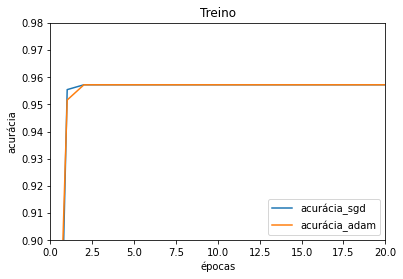

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.plot(sgd.history['accuracy'])
ax.plot(adam.history['accuracy'])
ax.set_xlim(0, 20)
ax.set_ylim(0.90, 0.98)
plt.title('Treino')
plt.ylabel('acurácia')
plt.xlabel('épocas')
plt.legend(['acurácia_sgd', 'acurácia_adam'], loc='lower right')
plt.show()

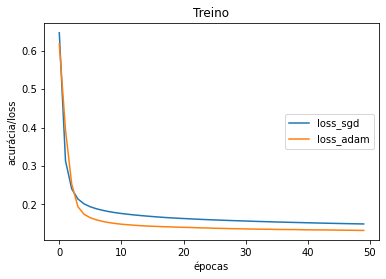

In [ ]:
plt.plot(sgd.history['loss'])
plt.plot(adam.history['loss'])
plt.title('Treino')
plt.ylabel('acurácia/loss')
plt.xlabel('épocas')
plt.legend(['loss_sgd', 'loss_adam'], loc='center right')
plt.show()